<a href="https://colab.research.google.com/github/V1PASH/PYTORCH/blob/main/Make_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import sklearn
from sklearn.datasets import make_moons

In [ ]:
x,y=make_moons(n_samples=1000,noise=0.15,random_state=42)

x,y=torch.from_numpy(x).type(torch.float),torch.from_numpy(y).type(torch.float)

In [ ]:
y.shape,x.shape

(torch.Size([1000]), torch.Size([1000, 2]))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [ ]:
y_train.shape,y_test.shape

(torch.Size([800]), torch.Size([200]))

In [ ]:
type(x)

torch.Tensor

In [ ]:
device ="cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

### Model

Binary classification

In [ ]:
class moons(nn.Module):
  def __init__(self):
    super().__init__()

    self.layers=nn.Sequential(nn.Linear(in_features=2,out_features=10),
                              nn.ReLU(),
                              nn.Linear(in_features=10,out_features=10),
                              nn.ReLU(),
                              nn.Linear(in_features=10,out_features=1),
                              )
  def forward(self,x):
    return self.layers(x)

In [ ]:
model0=moons()

In [ ]:
model0

moons(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [ ]:
model0.eval()
with torch.inference_mode():
  logit=model0(x_test)

In [ ]:
pred=torch.round(torch.sigmoid(logit))
pred[:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred,y_test)

0.5

## lossfn

In [ ]:
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.01)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc =(correct/len(y_pred))*100
  return acc

In [ ]:
epochs=10000

for epoch in range(epochs):
  model0.train()
  logits=model0(x_train).squeeze()
  preds=torch.round(torch.sigmoid(logits)).squeeze()

  acc=accuracy_fn(y_pred=preds,y_true=y_train)

  loss=loss_fn(logits,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model0.eval()

  if epoch%1000==0:

    test_logits=model0(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    test_loss=loss_fn(test_logits,y_test)
    print(f"{epoch} train data {loss} | {acc}  || test data  {test_loss} | {test_acc}")

0 train data 0.11181677132844925 | 96.0  || test data  0.09951389580965042 | 96.5
1000 train data 0.08843868225812912 | 97.25  || test data  0.07471957802772522 | 98.0
2000 train data 0.07190022617578506 | 98.0  || test data  0.05761122703552246 | 98.5
3000 train data 0.060572098940610886 | 98.25  || test data  0.04633529484272003 | 100.0
4000 train data 0.05278298258781433 | 98.25  || test data  0.03919849917292595 | 100.0
5000 train data 0.04733453318476677 | 98.625  || test data  0.0342010073363781 | 100.0
6000 train data 0.043395888060331345 | 98.75  || test data  0.030449753627181053 | 100.0
7000 train data 0.04043697938323021 | 99.0  || test data  0.027630386874079704 | 100.0
8000 train data 0.03813353180885315 | 99.125  || test data  0.025510122999548912 | 100.0
9000 train data 0.03616969287395477 | 99.125  || test data  0.02386389672756195 | 100.0


## predictions

In [ ]:
import requests

from pathlib import Path

# download helper function from pytorch repo

if Path("helper_function.py").is_file():
  print("have")
else:
  print("download")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb")as f:
    f.write(request.content)

download


In [ ]:
from helper_functions import plot_predictions ,plot_decision_boundary

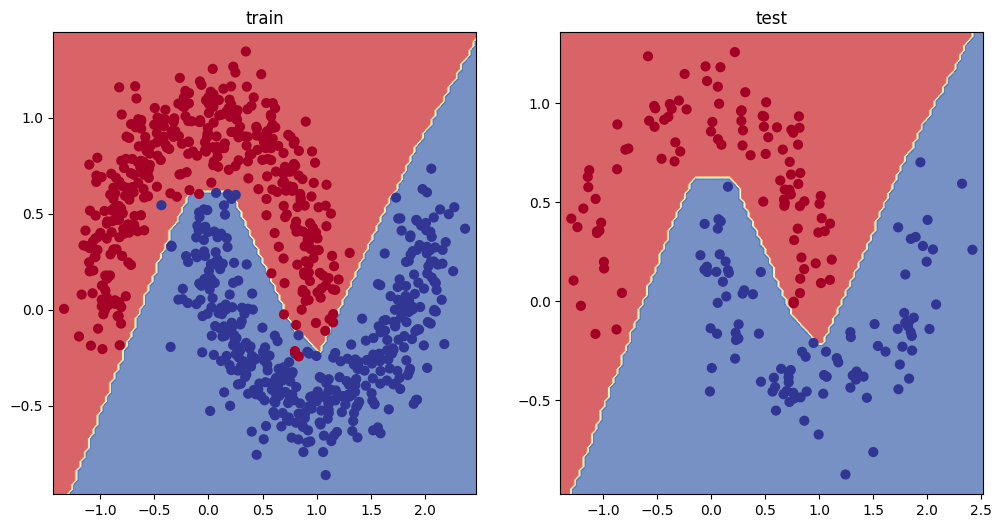

In [ ]:
#plot decision boundery of model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model0,x_test,y_test)